# Homework 3 Assignment

## Task

Using previously downloaded dataset, show the working of previously learned commands and draw certain conclusions about the data

## Solution

## Section I. Previously used commands

### Task 1. Loading the dataframe

Similarly to the previous task, we download the dataset

In [46]:
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import numpy as np

# Specifying path to the file containing our dataset
DATASET_PATH = 'StudentsPerformance.csv'

# Loading the dataframe
df = pd.read_csv(DATASET_PATH, delimiter=',')
df.head(6) # Showing first 6 entries

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78


### Task 2. Inspecting data

Now, checking info about the selected dataset

In [3]:
# Showing shape
print(f'Shape of the dataset is {df.shape}')

# Showing information
print('\n--- Information about the dataset ---')
df.info()

# Showing columns
print('\n--- Dataset columns ---')
print([column for column in df.columns])

# Dataset description
print('\n--- Dataset description ---')
df.describe()

Shape of the dataset is (1000, 8)

--- Information about the dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB

--- Dataset columns ---
['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score']

--- Dataset description ---


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Task 3. Dropping and selecting

Let us drop "race/ethnicity" and "lunch" columns as they are probably not relevant to the resultant scores

In [4]:
df = df.drop(['race/ethnicity', 'lunch'], axis=1)
df

,gender,parental level of education,test preparation course,math score,reading score,writing score
0,female,bachelor's degree,none,72,72,74
1,female,some college,completed,69,90,88
2,female,master's degree,none,90,95,93
3,male,associate's degree,none,47,57,44
4,male,some college,none,76,78,75
...,...,...,...,...,...,...
995,female,master's degree,completed,88,99,95
996,male,high school,none,62,55,55
997,female,high school,completed,59,71,65
998,female,some college,completed,68,78,77


From remaining columns let us select everything except for "gender"

In [5]:
selected_columns = [column for column in df.columns if column != 'gender']

print(f'Remaining columns except for "gender" are:\n{selected_columns}')

Remaining columns except for "gender" are:
['parental level of education', 'test preparation course', 'math score', 'reading score', 'writing score']


### Step 4. Duplicates

Let us inspect and find some duplicates in data

In [6]:
duplicated = df.duplicated()
duplicated

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

It is unclear whether the data has duplicates at this point, so let us print the number of duplicates

In [7]:
duplicates_number = len([duplicated_true for duplicated_true in duplicated if duplicated_true is True])
print(f"The duplicates number is {duplicates_number}")

The duplicates number is 2


Aha! So we do have some duplicates! Let us print them

In [8]:
df[df.duplicated(keep=False) == True]

,gender,parental level of education,test preparation course,math score,reading score,writing score
452,female,associate's degree,none,65,77,74
613,female,associate's degree,none,65,77,74
632,female,bachelor's degree,completed,66,74,81
692,female,bachelor's degree,completed,66,74,81


So we have only two duplicates. However, let us add some more!

Select first 10 columns and append to the dataframe

In [9]:
DUPLICATES_NUMBER = 10 # Define the number of duplicates to add

df_duplicate_rows = df[:DUPLICATES_NUMBER] # We are going to add these rows to the existing dataframe
corrupted_df = pd.concat([df, df_duplicate_rows], ignore_index=True)

# Asserting that we indeed added the proper number of duplicates
assert corrupted_df.shape[0] == df.shape[0] + DUPLICATES_NUMBER, 'duplicates added incorrectly!'

# Now, let us see what .duplicated() gives us
corrupted_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1005     True
1006     True
1007     True
1008     True
1009     True
Length: 1010, dtype: bool

Let us drop duplicates now:

In [10]:
df = corrupted_df.drop_duplicates()
df

,gender,parental level of education,test preparation course,math score,reading score,writing score
0,female,bachelor's degree,none,72,72,74
1,female,some college,completed,69,90,88
2,female,master's degree,none,90,95,93
3,male,associate's degree,none,47,57,44
4,male,some college,none,76,78,75
...,...,...,...,...,...,...
995,female,master's degree,completed,88,99,95
996,male,high school,none,62,55,55
997,female,high school,completed,59,71,65
998,female,some college,completed,68,78,77


As expected, since we had 12 duplicates, we now have 998 rows!

### Step 5. Empty data

Let us first check whether there are any rows with empty values:

In [11]:
print(
    'dataset contains no empty values' 
    if len(df[df.isna().any(axis=1)]) == 0 
    else 'dataset contains some empty values'
)

dataset contains no empty values


Yikes, our dataset is too perfect. Let us add some empty values

In [12]:
# Creating corrupted data with empty rows
df_empty_rows = pd.DataFrame(data = {
    'gender': ['female', 'male', 'female'],
    'parental level of education': ['high school', 'some college', 'high school'],
    'test preparation course': ['none', 'none', 'completed'],
    'math score': [100, 50, 100],
    'reading score': [None, 50, 100],
    'writing score': [100, 50, None]
})
assert len(df_empty_rows[df_empty_rows.isna().any(axis=1)]) == 2, 'we should have two additional corrupted rows!'

# Concetenating our dataframe with the corrupted one
corrupted_df = pd.concat([df, df_empty_rows], ignore_index=True)

corrupted_df.tail(5) # Showing last five lines with three of them being new

,gender,parental level of education,test preparation course,math score,reading score,writing score
996,female,some college,completed,68,78.0,77.0
997,female,some college,none,77,86.0,86.0
998,female,high school,none,100,NaN,100.0
999,male,some college,none,50,50.0,50.0
1000,female,high school,completed,100,100.0,NaN


Now, debugging the empty elements

In [13]:
corrupted_df[corrupted_df.isna().any(axis=1)]

,gender,parental level of education,test preparation course,math score,reading score,writing score
998,female,high school,none,100,NaN,100.0
1000,female,high school,completed,100,100.0,NaN


Removing corrupted rows!

In [14]:
corrupted_df.dropna()

,gender,parental level of education,test preparation course,math score,reading score,writing score
0,female,bachelor's degree,none,72,72.0,74.0
1,female,some college,completed,69,90.0,88.0
2,female,master's degree,none,90,95.0,93.0
3,male,associate's degree,none,47,57.0,44.0
4,male,some college,none,76,78.0,75.0
...,...,...,...,...,...,...
994,male,high school,none,62,55.0,55.0
995,female,high school,completed,59,71.0,65.0
996,female,some college,completed,68,78.0,77.0
997,female,some college,none,77,86.0,86.0


So now we have indeed by 2 rows less!

## Section II: Drawing conclusions about the data

### Part I: Drawing histogram of Math Scores

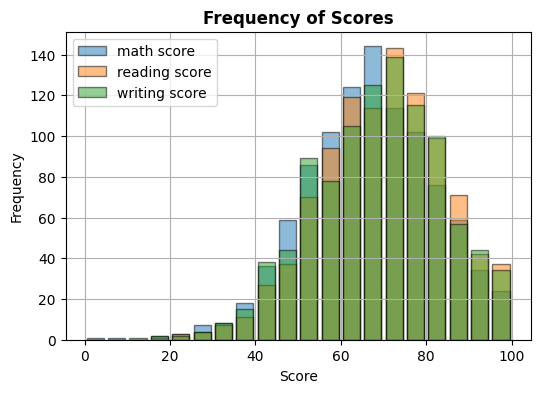

In [30]:
ax = df.plot.hist(column=["math score", "reading score", "writing score"], 
            figsize=(6, 4),
            alpha=0.5,
            bins=20,
            edgecolor='black',
            rwidth=0.8,
            grid = True)

ax.set_title('Frequency of Scores', weight='bold') 

# Add label names
ax.set_xlabel('Score')
ax.set_ylabel('Frequency')

# Show the plot
plt.show()

I was a bit curious to approximate this distribution using normal distribution, so here it goes...

Recall that the normal distribution is defined as:

$$
\mathcal{N}(x|\mu,\sigma) \triangleq \frac{1}{\sqrt{2\pi}\sigma}\exp\left[-\frac{(x-\mu)^2}{2\sigma^2}\right]
$$

Given a dataset $x_1,x_2,\dots,x_n \sim \mathcal{N}(\star | \mu,\sigma)$, we can find MLE estimate of parameters $(\mu,\sigma)$:

$$
\hat{\mu} = \frac{1}{n}\sum_{i=1}^n x_i, \quad \hat{\sigma}^2 = \frac{1}{n}\sum_{i=1}^n x_i^2 - \hat{\mu}^2
$$

estimated mean is 66.089, while the std is 15.155496659628142


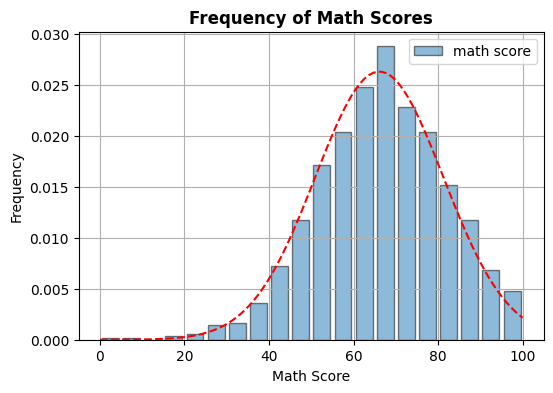

In [56]:
# Finding the expected value estimate
mu_estimate = np.mean(df["math score"])

# Finding the variance value estimate
sigma_squared_estimate = np.mean(df["math score"]**2) - mu_estimate**2
sigma_estimate = np.sqrt(sigma_squared_estimate)

# Printing results
print(f'estimated mean is {mu_estimate}, while the std is {sigma_estimate}')

# Printing math score together with the normal distribution
ax = df.plot.hist(column=["math score"], 
            figsize=(6, 4),
            alpha=0.5,
            bins=20,
            density=True,
            edgecolor='black',
            rwidth=0.8,
            grid = True)

# Adding normal distribution plot
normal_distribution_range = np.linspace(0, 100, 100)
plt.plot(normal_distribution_range, 
         stats.norm.pdf(normal_distribution_range, mu_estimate, sigma_estimate),
        color='r', linestyle='dashed')

# Adding title
ax.set_title('Frequency of Math Scores', weight='bold') 

# Add label names
ax.set_xlabel('Math Score')
ax.set_ylabel('Frequency')

# Show the plot
plt.show()

Also, out of curiosity, let us find out what is the probability that the math score is above $\theta$ given that:

1. The student had some preparation beforehand
2. The student did not have one

Suppose $E$ means that the student had some preparation, while $\overline{E}$ that he did not. Additionally, assume $\xi$ is the score the student got. Then,

$$
\text{Pr}[\xi > \theta | E] = \frac{\text{Pr}[\xi > \theta, E]}{\text{Pr}[E]}
$$

Assume that we have the dataset $\mathcal{D} = \{\xi_j, p_j\}_{1 \leq j \leq n}$ where $\xi_j$ is the score obtained, while $p_j \in \{0,1\}$ is whether the student had some preparation. Then,
$$
\text{Pr}[\xi > \theta | E] \approxeq \frac{\#\{(\xi_j,p_j) \in \mathcal{D}: \xi_j > \theta, p_j=1\}}{\#\{(\xi_j,p_j) \in \mathcal{D}: p_j=1\}},
$$

where $\# X$ denotes the number of elements in set $X$.

In [59]:
# Leaving only test preparation course and math score
filtered_df = df.drop(df.columns.difference(['test preparation course', 'math score']), axis=1)
filtered_df

,test preparation course,math score
0,none,72
1,completed,69
2,none,90
3,none,47
4,none,76
...,...,...
995,completed,88
996,none,62
997,completed,59
998,completed,68


Additionally, assert that only 'none' and 'completed' options are present in the dataset

In [66]:
assert set(filtered_df['test preparation course']) == {'none', 'completed'}, 'df contains something else besides none and completed'

Now, let us calculate $\text{Pr}[\xi > \theta | E]$:

In [77]:
def calculate_conditional_probability(theta: float, preparation: str = 'completed') -> float:
    """
    Calculates the probability of getting the score above theta given preparation
    """
    
    nominator_df = df[(df['math score'] > theta) & (df['test preparation course'] == preparation)]
    denominator_df = df[df['test preparation course'] == 'completed']
    return len(nominator_df) / len(denominator_df)

print(f'The searched probability is {calculate_conditional_probability(50)}')

The searched probability is 0.9078212290502793


Seems quite reasonable. Let us plot this dependency for various theta and whether preparation was present or not

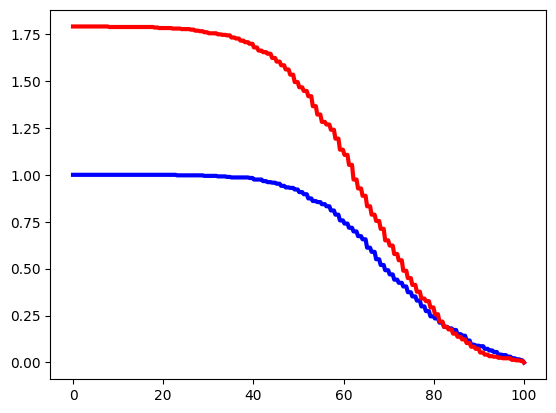

In [93]:
# Finding probabilities
thetas = np.linspace(0, 100, 300) # Defining the range of constants
prep_probabilities = [calculate_conditional_probability(theta, preparation='completed') for theta in thetas]
no_prep_probabilities = [calculate_conditional_probability(theta, preparation='none') for theta in thetas]

# Plotting the graph
plt.plot(thetas, prep_probabilities, 'b', linewidth=3) 
plt.plot(thetas, no_prep_probabilities, 'red', linewidth=3) 

**Conclusion:** Probability of getting the score higher than 80 does not depend on whether the student had taken the test preparation course before.